In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error ,mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df  = pd.DataFrame(load_diabetes().data)
df.columns  = load_diabetes().feature_names

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
load_diabetes().target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

In [ ]:
df

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Hours of Study","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"Marks","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"Marks","scale":{"scheme":"redpurple"}}}}]}],"title":"Hours of study V/S marks","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

<AxesSubplot: >

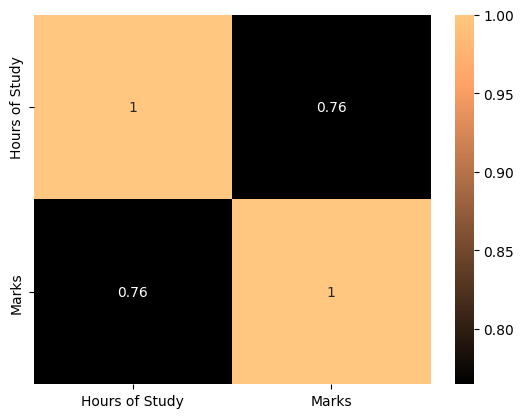

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='copper')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [ ]:
stanscale = StandardScaler()

In [ ]:
x =  stanscale.fit_transform(x.reshape(-1,1))
y = stanscale.fit_transform(y.reshape(-1,1))

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(x_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred  = model.predict(x_test)

In [ ]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [ ]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

Text(0, 0.5, 'predicted marks')

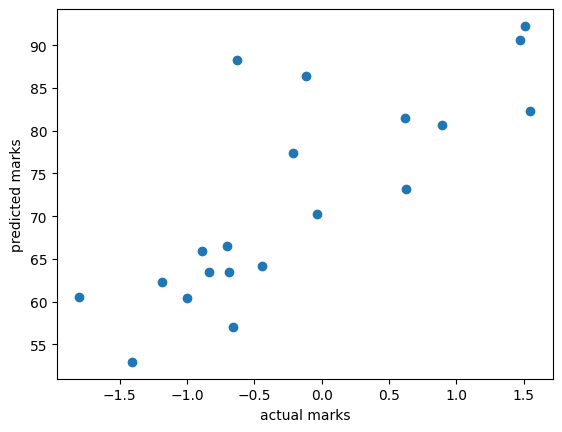

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual marks")
plt.ylabel('predicted marks')

In [ ]:
stanscale.inverse_transform(model.predict([[5]]).reshape(1,-1))

array([[71.50453478]])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

In [ ]:
print(y_test)
print(y_pred)

[[-1.00224427]
 [ 0.62160848]
 [-0.70156137]
 [-1.40938966]
 [ 0.89018186]
 [-0.03229448]
 [-1.79768014]
 [-0.89032789]
 [-0.65528619]
 [-0.11790059]
 [-0.62633786]
 [-0.21538463]
 [-0.68441449]
 [-0.44658889]
 [ 0.62827334]
 [ 1.46933383]
 [ 1.50879256]
 [ 1.54854301]
 [-0.8381571 ]
 [-1.18692938]]
[[60.39764577]
 [81.48677868]
 [66.49889641]
 [52.93601862]
 [80.71338315]
 [70.24215505]
 [60.59170512]
 [65.92240434]
 [56.96814488]
 [86.44247075]
 [88.27618157]
 [77.33308614]
 [63.51595177]
 [64.15643611]
 [73.17585776]
 [90.56964555]
 [92.26453877]
 [82.25831189]
 [63.41941707]
 [62.23679956]]


In [ ]:
r2_score(stanscale.inverse_transform(y_test), y_pred)

0.5943071038285547

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=092db9f4-8ca6-4f26-b861-61a1e4db6b37' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>